In [52]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [53]:
# Load data from file
df = pd.read_csv("results-executives.csv", dtype=str)

# Data Cleaning
df["full_name"] = df["last_name"] + ", " + df["first_name"]

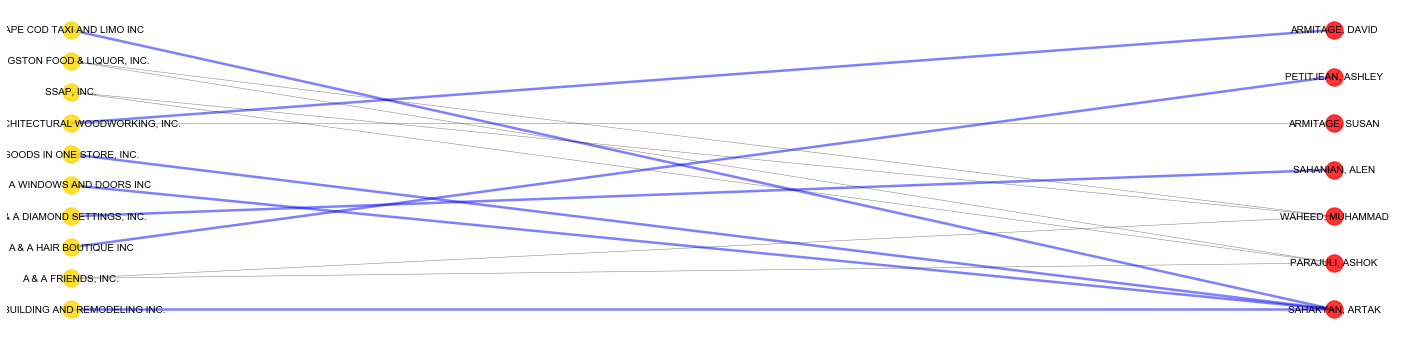

In [54]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Get the top 10 most connected business entities
top_entities = df["business_entity"].value_counts().nlargest(10).index

# Filter the dataframe to only include top entities
df = df[df["business_entity"].isin(top_entities)]

# Create bipartite graph
G = nx.Graph()
G.add_nodes_from(df["full_name"], bipartite=0)
G.add_nodes_from(df["business_entity"], bipartite=1)
G.add_edges_from(zip(df["full_name"], df["business_entity"]))

# Get position for all nodes using bipartite layout
pos = nx.bipartite_layout(G, df["business_entity"], align='vertical')

# Define node colors for Names and Entities
name_color = 'red'
entity_color = 'gold'

# Define edge colors for different titles
edge_colors = []
for u, v, data in G.edges(data=True):
    title = df.loc[df['full_name'] == u, 'title'].iloc[0]
    if title == 'PRESIDENT':
        edge_colors.append('blue')
    elif title == 'DIRECTOR':
        edge_colors.append('green')
    else:
        edge_colors.append('black')

# Define edge widths for different titles
edge_widths = []
for u, v, data in G.edges(data=True):
    title = df.loc[df['full_name'] == u, 'title'].iloc[0]
    if title == 'PRESIDENT':
        edge_widths.append(2.5)
    elif title == 'DIRECTOR':
        edge_widths.append(1.5)
    else:
        edge_widths.append(0.5)

# Draw Nodes
name_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 0]
entity_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 1]

fig, ax = plt.subplots(figsize=(25, 6))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, nodelist=name_nodes, node_color=name_color, alpha=0.8, label='Names')
nx.draw_networkx_nodes(G, pos, nodelist=entity_nodes, node_color=entity_color, alpha=0.8, node_shape='o', label='Entities')
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color=edge_colors)

# Draw Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Show Plot
plt.axis("off")
plt.show()

In [56]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Get the top 10 most connected business entities
top_entities = df["business_entity"].value_counts().nlargest(20).index

# Filter the dataframe to only include top entities
df = df[df["business_entity"].isin(top_entities)]

# Create bipartite graph
G = nx.Graph()
G.add_nodes_from(df["full_name"], bipartite=0)
G.add_nodes_from(df["business_entity"], bipartite=1)
G.add_edges_from(zip(df["full_name"], df["business_entity"]))

# Get position for all nodes using bipartite layout
pos = nx.bipartite_layout(G, df["business_entity"], align='vertical')

# Define node colors for Names and Entities
name_color = 'red'
entity_color = 'gold'

# Define edge colors for different titles
edge_colors = []
for u, v, data in G.edges(data=True):
    title = df.loc[df['full_name'] == u, 'title'].iloc[0]
    if title == 'PRESIDENT':
        edge_colors.append('blue')
    elif title == 'DIRECTOR':
        edge_colors.append('green')
    else:
        edge_colors.append('black')

# Define edge widths for different titles
edge_widths = []
for u, v, data in G.edges(data=True):
    title = df.loc[df['full_name'] == u, 'title'].iloc[0]
    if title == 'PRESIDENT':
        edge_widths.append(5.5)
    elif title == 'DIRECTOR':
        edge_widths.append(2.5)
    else:
        edge_widths.append(0.5)

# Create the network visualization
nt = Network(height="750px", width="100%", bgcolor="#f0f0f0", font_color="black")

# Add nodes and edges to the visualization
for name in G.nodes:
    node_type = G.nodes[name]["bipartite"]
    node_color = name_color if node_type == 0 else entity_color
    nt.add_node(name, color=node_color, title=name)

for u, v, data in G.edges(data=True):
    title = df.loc[df['full_name'] == u, 'title'].iloc[0]
    if title == 'PRESIDENT':
        color = 'blue'
        width = 5.5
    elif title == 'DIRECTOR':
        color = 'green'
        width = 2.5
    else:
        color = 'black'
        width = 0.5
    nt.add_edge(u, v, color=color, width=width)

# Set the layout and show the visualization
nt.barnes_hut(gravity=-10000, central_gravity=0.3, spring_length=100, spring_strength=0.1, damping=0.95)
nt.show("network.html")

# Selection-based

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [58]:
# Load data from file
df = pd.read_csv("results-executives.csv", dtype=str)

# Data Cleaning
df["full_name"] = df["last_name"] + ", " + df["first_name"]

Dropdown(description='Company:', options=('184 PLEASANT VALLEY, LLC', '2', '218 WIANNO LLC', '232 LLC', '232, …

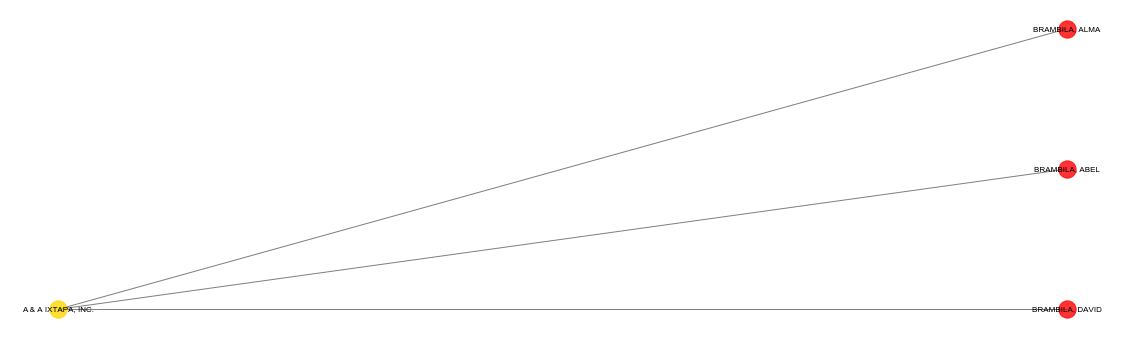

In [68]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load data from file
df = pd.read_csv("results-executives.csv")

# Data Cleaning
df["full_name"] = df["last_name"] + ", " + df["first_name"]

# Cast all values in the "business_entity" column to string
df["business_entity"] = df["business_entity"].astype(str)

# Define a function to create the bipartite graph
def create_bipartite_graph(company_name):
    # Filter the DataFrame to keep only the rows with the selected company
    sub_df = df[df["business_entity"] == company_name]
    
    # Create bipartite graph
    G = nx.Graph()
    G.add_nodes_from(sub_df["full_name"], bipartite=0)
    G.add_nodes_from(sub_df["business_entity"], bipartite=1)
    G.add_edges_from(zip(sub_df["full_name"], sub_df["business_entity"]))

    # Get position for all nodes using bipartite layout
    pos = nx.bipartite_layout(G, sub_df["business_entity"], align='vertical')

    # Define node colors for Names and Entities
    name_color = 'red'
    entity_color = 'gold'

    # Draw Nodes
    name_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 0]
    entity_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 1]

    fig, ax = plt.subplots(figsize=(20, 6)) # Set figure size
    nx.draw_networkx_nodes(G, pos, nodelist=name_nodes, node_color=name_color, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=entity_nodes, node_color=entity_color, alpha=0.8, node_shape='o')

    # Draw Edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif") # Decrease font size

    # Show Plot
    plt.axis("off")
    plt.show()


# Create dropdown widget to select a company
company_names = sorted(df["business_entity"].astype(str).unique())
company_dropdown = widgets.Dropdown(options=company_names, description='Company:')

# Define a function to update the graph when a new company is selected
def update_layout(change):
    company_name = change.new
    create_bipartite_graph(company_name)

# Attach the update function to the dropdown widget
company_dropdown.observe(update_layout, names='value')

# Display the dropdown widget
display(company_dropdown)

Dropdown(description='Person:', options=('ABARE, DAVID', 'ABARE, KIMBERLY', 'ABREU, ANDY', 'AMARAL, NICHOLAS',…

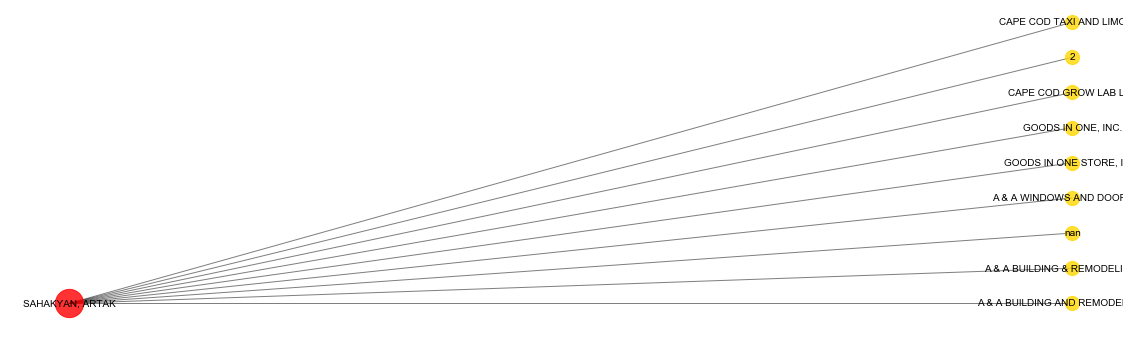

In [65]:
df = df.drop_duplicates(subset=["full_name", "business_entity"])

# Define a function to create the bipartite graph
def create_bipartite_graph(full_name):
    # Filter the DataFrame to keep only the rows with the selected person
    sub_df = df[df["full_name"] == full_name]
    
    # Create bipartite graph
    G = nx.Graph()
    G.add_nodes_from(sub_df["business_entity"], bipartite=0)
    G.add_nodes_from(sub_df["full_name"], bipartite=1)
    G.add_edges_from(zip(sub_df["business_entity"], sub_df["full_name"]))

    # Get position for all nodes using bipartite layout
    pos = nx.bipartite_layout(G, sub_df["full_name"], align='vertical')

    # Define node colors for Names and Entities
    name_color = 'red'
    entity_color = 'gold'

    # Draw Nodes
    name_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 1]
    entity_nodes = [n for n in G.nodes if G.nodes[n]['bipartite'] == 0]

    fig, ax = plt.subplots(figsize=(20, 6)) # Set figure size
    nx.draw_networkx_nodes(G, pos, nodelist=name_nodes, node_color=name_color, alpha=0.8, node_size=800)
    nx.draw_networkx_nodes(G, pos, nodelist=entity_nodes, node_color=entity_color, alpha=0.8, node_shape='o', node_size=200)

    # Draw Edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw node labels
    name_labels = {n: df[df["full_name"] == n]["full_name"].values[0] for n in name_nodes}
    entity_labels = {n: df[df["business_entity"] == n]["business_entity"].values[0] for n in entity_nodes}
    labels = {**name_labels, **entity_labels}  # Combine dictionaries
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_family="sans-serif")

    # Show Plot
    plt.axis("off")
    plt.show()


# Create dropdown widget to select a person
person_names = sorted(df["full_name"].unique())
person_dropdown = widgets.Dropdown(options=person_names, description='Person:')

# Define a function to update the graph when a new person is selected
def update_layout(change):
    person_name = change.new
    create_bipartite_graph(person_name)

# Attach the update function to the dropdown widget
person_dropdown.observe(update_layout, names='value')

# Display the dropdown widget
display(person_dropdown)

# Save as PDF

Dropdown(description='Person:', options=('ABARE, DAVID', 'ABARE, KIMBERLY', 'ABREU, ANDY', 'AMARAL, NICHOLAS',…

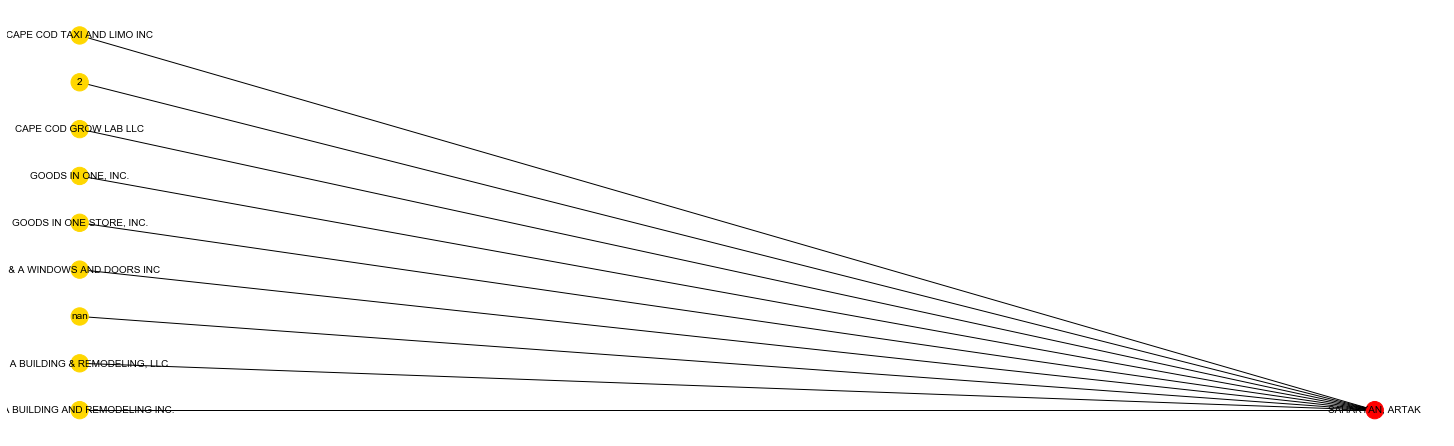

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from matplotlib.backends.backend_pdf import PdfPages

df = df.astype(str)

df = df.drop_duplicates(subset=["full_name", "business_entity"])

# Define a function to create the bipartite graph
def create_bipartite_graph(full_name):
    # Filter the DataFrame to keep only the rows with the selected person
    sub_df = df[df["full_name"] == full_name]

    # Create bipartite graph
    G = nx.Graph()

    # Add nodes to graph
    name_nodes = {}
    entity_nodes = {}
    for i, row in sub_df.iterrows():
        name = str(row["full_name"])
        entity = str(row["business_entity"])
        if name not in name_nodes:
            name_nodes[name] = 1
            G.add_node(name, bipartite=0)
        if entity not in entity_nodes:
            entity_nodes[entity] = 1
            G.add_node(entity, bipartite=1)

        # Add edge to graph
        G.add_edge(entity, name)

    # Draw graph
    plt.figure(figsize=(20,6))
    pos = nx.bipartite_layout(G, entity_nodes.keys())
    labels = {}
    for node in G.nodes():
        if node in entity_nodes:
            labels[node] = node.split(" - ")[-1]
        else:
            labels[node] = node
    nx.draw(G, pos=pos, with_labels=True, labels=labels, font_size=10, node_color=["gold" if n in entity_nodes else "red" for n in G.nodes()])
    
    # Save graph as PDF
    pp = PdfPages('bipartite_graph.pdf')
    pp.savefig()
    pp.close()
    
    plt.show()

# Create dropdown widget to select a person
person_names = sorted(df["full_name"].unique())
person_dropdown = widgets.Dropdown(options=person_names, description='Person:')

# Define a function to update the graph when a new person is selected
def update_layout(change):
    person_name = change.new
    create_bipartite_graph(person_name)

# Attach the update function to the dropdown widget
person_dropdown.observe(update_layout, names='value')

# Display the dropdown widget
display(person_dropdown)

Dropdown(description='Entity:', options=('184 PLEASANT VALLEY, LLC', '2', '218 WIANNO LLC', '232 LLC', '232, L…

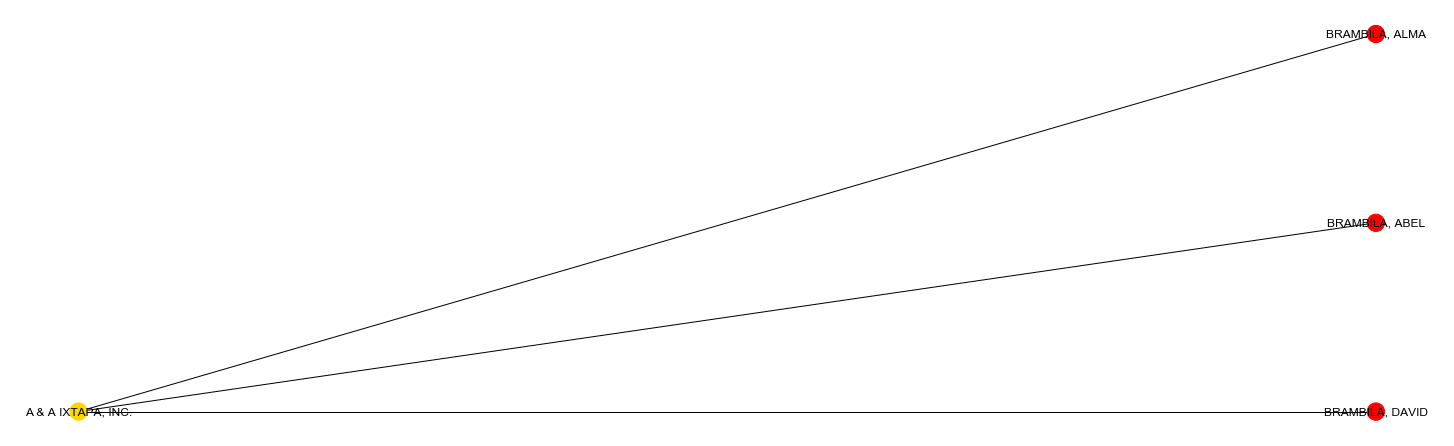

In [67]:
import pydot
from IPython.display import display, display_pdf
from ipywidgets import widgets
import networkx as nx
import matplotlib.pyplot as plt

df = df.astype(str)

df = df.drop_duplicates(subset=["full_name", "business_entity"])

# Define a function to create the bipartite graph
def create_bipartite_graph(entity):
    # Filter the DataFrame to keep only the rows with the selected entity
    sub_df = df[df["business_entity"] == entity]

    # Create bipartite graph
    G = nx.Graph()

    # Add nodes to graph
    name_nodes = {}
    entity_nodes = {}
    for i, row in sub_df.iterrows():
        name = str(row["full_name"])
        entity = str(row["business_entity"])
        if name not in name_nodes:
            name_nodes[name] = 1
            G.add_node(name, bipartite=0)
        if entity not in entity_nodes:
            entity_nodes[entity] = 1
            G.add_node(entity, bipartite=1)

        # Add edge to graph
        G.add_edge(entity, name)

    # Draw graph
    plt.figure(figsize=(20,6))
    pos = nx.bipartite_layout(G, entity_nodes.keys())
    nx.draw(G, pos=pos, with_labels=True, node_color=["gold" if n in entity_nodes else "red" for n in G.nodes()])
    plt.savefig('company_graph.pdf')

    # Display graph
    with open('company_graph.pdf', 'rb') as f:
        pdf_data = f.read()
    display_pdf(pdf_data, raw=True)

# Create dropdown widget to select an entity
entity_names = sorted(df["business_entity"].unique())
entity_dropdown = widgets.Dropdown(options=entity_names, description='Entity:')

# Define a function to update the graph when a new entity is selected
def update_layout(change):
    entity_name = change.new
    create_bipartite_graph(entity_name)

# Attach the update function to the dropdown widget
entity_dropdown.observe(update_layout, names='value')

# Display the dropdown widget
display(entity_dropdown)